# 🚀 머신러닝 실습 : 고객 구매 데이터로 성별 예측 모델링 (분류 문제)

* 주어진 데이터는 백화점 고객의 1년 간 구매 데이터입니다.
* 고객 3,500명에 대한 학습용 데이터(y.csv, X.csv)를 이용하여 성별예측 모형을 만들어보세요.
* 모델의 성능은 자유롭게 측정해봅니다!

## [실습 프로세스]
1. 데이터 불러오기  
2. 데이터 탐색
3. 데이터 전처리  
4. 학습/테스트 데이터 분리  
5. 모델 선택 및 학습  
6. 예측 및 평가  


<br/>

---

<br/>
<br/>

# 0. 라이브러리 불러오기

* 라이브러리를 가져와서 과정을 준비합니다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

<br/>

---

<br/>
<br/>

# 1. 데이터 불러오기
* 데이터를 가져와서 과정을 준비합시다.
- 인코딩 방식은 'euc-kr' 을 활용하세요.
- 데이터 출처 : 한국데이터산업진흥원 빅데이터분석기사 실기 공개 예시 문항

- 독립 변수 데이터셋 : ./data/X.csv
- 종속 변수 데이터셋 : ./data/y.csv


데이터 파일을 불러옵니다. 보통 CSV 파일을 pandas로 읽어옵니다.

In [2]:
import os
# 노트북 파일이 있는 폴더로 이동 (예시)
os.chdir(r'C:\githome\hipython_rep')

# 변경 후 확인
print("변경 후:", os.getcwd())

변경 후: c:\githome\hipython_rep


In [3]:
X = pd.read_csv('./data1/X.csv', encoding='euc-kr')
y = pd.read_csv('./data1/y.csv', encoding='euc-kr')

<br/>

---

<br/>
<br/>

# 2. 데이터 탐색하기
* 데이터를 이해할 수 있도록 탐색과정을 수행해봅시다.


데이터의 상위 몇 개 행을 출력하여 전체 구조를 미리 확인합니다.

In [6]:
X.head(10)

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
5,5,11379000,9552000,462000.0,디자이너,일산점,3,1.666667,0.200000,42
6,6,10056000,7612000,4582000.0,시티웨어,강남점,5,2.400000,0.333333,42
7,7,514570080,27104000,29524000.0,명품,본 점,63,2.634921,0.222892,5
8,8,688243360,173088000,NaN,기타,본 점,18,5.944444,0.411215,15
9,9,26640850,13728000,NaN,농산물,대전점,1,12.000000,0.000000,0


In [7]:
y.head(10)

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,1



데이터의 요약 정보나 통계 정보를 출력해 변수들의 유형과 분포를 확인합니다.

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 273.6+ KB


X에서 null이 3500- 1205 = 2295개 있다.
주구매상품, 주구매지점을 제외하고는 다 수치형 데이터.

In [11]:
X['주구매상품'].value_counts()

주구매상품
기타        595
가공식품      546
농산물       339
화장품       264
시티웨어      213
디자이너      193
수산품       153
캐주얼       101
명품        100
섬유잡화       98
골프         82
스포츠        69
일용잡화       64
육류         57
모피/피혁      57
남성 캐주얼     55
구두         54
건강식품       47
차/커피       44
피혁잡화       40
아동         40
축산가공       35
주방용품       32
셔츠         30
젓갈/반찬      29
주방가전       26
트래디셔널      23
남성정장       22
생활잡화       15
주류         14
가구         10
커리어         9
란제리/내의      8
대형가전        8
식기          7
액세서리        5
침구/수예       4
보석          3
통신/컴퓨터      3
남성 트랜디      2
소형가전        2
악기          2
Name: count, dtype: int64

In [ ]:
X['주구매지점'].value_counts()

주구매지점
본  점     1077
잠실점       474
분당점       436
부산본점      245
영등포점      241
일산점       198
강남점       145
광주점       114
노원점        90
청량리점       86
대전점        70
미아점        69
부평점        57
동래점        49
관악점        46
인천점        34
안양점        29
포항점        11
대구점         7
센텀시티점       6
울산점         6
전주점         5
창원점         4
상인점         1
Name: count, dtype: int64

In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cust_id  3500 non-null   int64
 1   gender   3500 non-null   int64
dtypes: int64(2)
memory usage: 54.8 KB


y에서 null은 없다.

데이터의 요약 정보나 통계 정보를 출력해 변수들의 유형과 분포를 확인합니다.

<br/>

---

<br/>
<br/>

# 3. 데이터 전처리
* 전처리 과정을 통해서 머신러닝에 사용할 수 있는 형태의 데이터 준비


필요한 라이브러리를 불러옵니다.
- 인코딩 : LabelEncoder
- 데이터 표준화 : StandardScaler

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

* 단순히 1부터의 숫자를 부여한 'cust_id'를 수치형 변수로 받아들이면, 결과가 왜곡될 수 있으니 컬럼을 제거합니다.

In [16]:
X.drop('cust_id', axis=1, inplace=True)

In [29]:
y.drop('cust_id', axis=1, inplace=True)

- 데이터에 결측치가 있는지 확인해보세요


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총구매액     3500 non-null   int64  
 1   최대구매액    3500 non-null   int64  
 2   환불금액     1205 non-null   float64
 3   주구매상품    3500 non-null   object 
 4   주구매지점    3500 non-null   object 
 5   내점일수     3500 non-null   int64  
 6   내점당구매건수  3500 non-null   float64
 7   주말방문비율   3500 non-null   float64
 8   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 246.2+ KB


X에서 null이 3500- 1205 = 2295개 있다.
주구매상품, 주구매지점을 제외하고는 다 수치형 데이터.

- 결측치에 0으로 채워 넣어 모델 학습에 지장이 없도록 합니다.

In [18]:
X['환불금액'].fillna(0, inplace=True)

In [20]:
X['환불금액'].isnull().sum()

np.int64(0)


문자형 범주 데이터를 숫자로 바꾸기 위한 인코딩을 수행합니다.

In [21]:
le1 = LabelEncoder()
le2 = LabelEncoder()

X['주구매상품'] = le1.fit_transform(X['주구매상품'])
X['주구매지점'] = le2.fit_transform(X['주구매지점'])

# 각 클래스(고유값) 확인
print(le1.classes_)  # 주구매상품 카테고리 목록
print(le2.classes_)  # 주구매지점 카테고리 목록

['가공식품' '가구' '건강식품' '골프' '구두' '기타' '남성 캐주얼' '남성 트랜디' '남성정장' '농산물' '대형가전'
 '디자이너' '란제리/내의' '명품' '모피/피혁' '보석' '생활잡화' '섬유잡화' '셔츠' '소형가전' '수산품' '스포츠'
 '시티웨어' '식기' '아동' '악기' '액세서리' '육류' '일용잡화' '젓갈/반찬' '주류' '주방가전' '주방용품'
 '차/커피' '축산가공' '침구/수예' '캐주얼' '커리어' '통신/컴퓨터' '트래디셔널' '피혁잡화' '화장품']
['강남점' '관악점' '광주점' '노원점' '대구점' '대전점' '동래점' '미아점' '본  점' '부산본점' '부평점' '분당점'
 '상인점' '센텀시티점' '안양점' '영등포점' '울산점' '인천점' '일산점' '잠실점' '전주점' '창원점' '청량리점'
 '포항점']


각 데이터에 표준화를 적용하여 데이터의 스케일(크기 차이)을 맞춰줍니다.
- 평균을 0, 표준편차를 1로 맞춰서 → 데이터가 정규 분포 형태로 변환되도록 하세요

In [24]:
# 수치형 변수만 골라서 스케일링 (cust_id는 이미 삭제했음)
scale_cols = ['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기']

In [25]:
scaler = StandardScaler()

# 표준화
X[scale_cols] = scaler.fit_transform(X[scale_cols])

In [26]:
X[scale_cols].describe()

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03
mean,-3.349701e-17,-4.263256e-17,3.248195e-17,4.669281e-17,-2.618858e-16,7.917476e-17,-4.263256e-17
std,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00
min,-8.829091e-01,-7.082781e-01,-2.754289e-01,-6.718072e-01,-9.596611e-01,-1.060530e+00,-8.469655e-01
25%,-5.332182e-01,-5.248643e-01,-2.754289e-01,-6.350034e-01,-6.110034e-01,-9.663293e-01,-6.853177e-01
50%,-3.896215e-01,-3.072187e-01,-2.754289e-01,-4.141802e-01,-2.623457e-01,-1.754721e-01,-3.216100e-01
75%,8.923657e-02,1.031100e-01,-1.876399e-01,2.114855e-01,2.824320e-01,4.892244e-01,2.845695e-01
max,1.364826e+01,2.147585e+01,1.845531e+01,9.780490e+00,1.006664e+01,2.391196e+00,5.861421e+00


In [170]:
X.head()

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,-0.144580,-0.262608,-0.047505,5,0,-0.009338,0.554247,0.758623,-0.159962
1,-0.549190,-0.547967,-0.265461,21,19,-0.635003,-0.698168,-1.060530,-0.806554
2,-0.542700,-0.563504,-0.275429,6,1,-0.635003,-0.436675,-1.060530,-0.806554
3,-0.463911,-0.460465,-0.275429,5,2,-0.046142,-0.204236,0.037746,-0.200374
4,-0.384561,0.135544,-0.275429,15,8,-0.635003,-0.698168,-1.060530,2.588052


In [190]:
y.head()

,gender
0,0
1,0
2,1
3,1
4,0


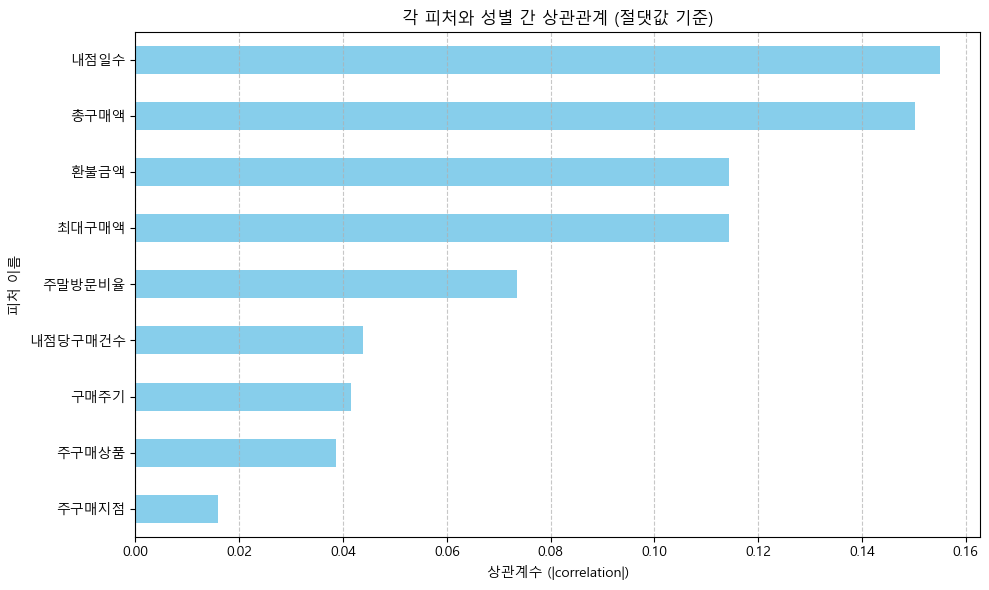

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import platform
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux or Colab
    !apt-get -qq install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

# 1. y 성별 숫자로 변환
le = LabelEncoder()
y_numeric = le.fit_transform(y)

# 2. 상관계수 계산
correlations = X.apply(lambda col: col.corr(pd.Series(y_numeric)))
correlations_sorted = correlations.abs().sort_values(ascending=True)

# 3. 시각화
plt.figure(figsize=(10, 6))
correlations_sorted.plot(kind='barh', color='skyblue')
plt.title('각 피처와 성별 간 상관관계 (절댓값 기준)')
plt.xlabel('상관계수 (|correlation|)')
plt.ylabel('피처 이름')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 새 특성을 만들어보기.

In [244]:
# 1. 모델 학습에 사용할 컬럼 이름 리스트를 만듭니다.
features_to_use = ['총구매액','최대구매액', '환불금액','내점일수'] 

# 2. 위 리스트를 이용해 원본 X에서 해당 컬럼들만 선택합니다.
X_selected = X[features_to_use]

# 3. 선택된 데이터(X_selected)를 train_test_split에 넣습니다.
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

<br/>

---

<br/>
<br/>

# 5-1. 모델링 - LogisticRegression

* 본격적으로 모델을 선언하고 학습시킵니다.


필요한 라이브러리를 불러옵니다.

In [69]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

모델을 선언하여 객체화시킵니다.

In [293]:
# 1. 데이터 분할 (X: 특성, y: 라벨)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)  # 클래스 불균형 대응

In [294]:
# 2. 모델 선언
LR_model = LogisticRegression(random_state=42, max_iter=1000)


모델을 학습 데이터에 맞춰 학습시킵니다.

In [295]:
# 3. 모델 학습
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<br/>

---

<br/>
<br/>

# 6-1. 예측 성능 확인해보기 - LogisticRegression

- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.

- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [141]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score
)

In [247]:
# 성능 예측 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred) # 혼동행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1 스코어 계산

    print(f'혼동행렬 \n : {confusion}')
    print('-'*20)
    print(f'정확도 : {accuracy:.5f}')
    print(f'정밀도 : {precision:.5f}')
    print(f'재현율 : {recall:.5f}')
    print(f'F1 스코어 : {f1:.5f}')

In [296]:
# 4. 예측
y_pred_LR = LR_model.predict(X_test)

# 5. 정확도 및 평가
accuracy_LR = accuracy_score(y_test, y_pred_LR)


get_clf_eval(y_test,y_pred_LR)

혼동행렬 
 : [[407  30]
 [227  36]]
--------------------
정확도 : 0.63286
정밀도 : 0.54545
재현율 : 0.13688
F1 스코어 : 0.21884



<br/>

---

<br/>
<br/>

# 5-2. 모델링 - DecisionTreeClassifier

* 본격적으로 모델을 선언하고 학습시킵니다.


필요한 라이브러리를 불러옵니다.

In [62]:
# 1. 필요한 라이브러리 및 클래스 불러오기
from sklearn.tree import DecisionTreeClassifier

모델을 선언하여 객체화시킵니다.

In [218]:
# 2. 모델 선언 및 객체화
# random_state를 지정하여 실행할 때마다 동일한 결과를 얻도록 합니다.
DTC_model = DecisionTreeClassifier(random_state=42)

모델을 학습 데이터에 맞춰 학습시킵니다.

In [249]:
# 3. 모델 학습
# 학습 데이터(X_train, y_train)를 이용하여 모델을 학습시킵니다.
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)



<br/>
<br/>

# 6-2. 예측 성능 확인해보기 - DecisionTreeClassifier

- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.

- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [250]:
# 4. 예측
y_pred_DTC = DTC_model.predict(X_test)

# 5. 성능 확인 및 평가
get_clf_eval(y_test,y_pred_DTC)

혼동행렬 
 : [[275 162]
 [151 112]]
--------------------
정확도 : 0.55286
정밀도 : 0.40876
재현율 : 0.42586
F1 스코어 : 0.41713



<br/>

---

<br/>
<br/>

# 5-3. 모델링 - RandomForestClassifier

* 본격적으로 모델을 선언하고 학습시킵니다.



필요한 라이브러리를 불러옵니다.

In [146]:
from sklearn.ensemble import RandomForestClassifier

모델을 선언하여 객체화시킵니다.

In [221]:
# 2. 모델 선언 및 객체화
# n_estimators는 생성할 트리의 개수를 의미합니다.
# random_state는 재현성을 위해 지정합니다.
RF_clf = RandomForestClassifier(n_estimators=100, random_state=42)

모델을 학습 데이터에 맞춰 학습시킵니다.

In [251]:
# 3. 모델 학습
# 학습 데이터(X_train, y_train)를 이용하여 모델을 학습시킵니다.
RF_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)



<br/>
<br/>

# 6-3. 예측 성능 확인해보기 - RandomForestClassifier

- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.

- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [252]:
# 1. 학습된 RF_clf 모델로 예측 수행
y_pred_RF = RF_clf.predict(X_test)
# 2. 평가 함수를 호출하여 결과 확인
get_clf_eval(y_test, y_pred_RF)

혼동행렬 
 : [[337 100]
 [180  83]]
--------------------
정확도 : 0.60000
정밀도 : 0.45355
재현율 : 0.31559
F1 스코어 : 0.37220



<br/>

---

<br/>
<br/>

# 5-4. 모델링 - XGBoost

* 본격적으로 모델을 선언하고 학습시킵니다.



필요한 라이브러리를 불러옵니다.

In [151]:
# 1. 필요한 라이브러리 및 클래스 불러오기
from xgboost import XGBClassifier

모델을 선언하여 객체화시킵니다.

In [253]:
# 2. 모델 선언 및 객체화
# XGBoost의 주요 하이퍼파라미터들을 설정할 수 있습니다.
# random_state는 재현성을 위해 지정합니다.
xgb_clf = XGBClassifier(random_state=42)

모델을 학습 데이터에 맞춰 학습시킵니다.

In [254]:
# 3. 모델 학습
# 학습 데이터(X_train, y_train)를 이용하여 모델을 학습시킵니다.
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [286]:
# 조기 종료 기능이 포함된 학습 코드
xgb_clf_early = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
# 학습 시 검증용 데이터(eval_set)를 지정합니다.
# 여기서는 테스트 데이터를 검증용으로 사용했습니다.
evals = [(X_test, y_test)]

# 조기 종료를 적용하여 모델 학습
# early_stopping_rounds=1000 : 1000번의 라운드 동안 성능 향상이 없으면 학습을 중단합니다.
# eval_metric='logloss' : 평가 지표로 logloss를 사용합니다.
xgb_clf_early.fit(X_train, y_train, 
                  early_stopping_rounds=1000, 
                  eval_metric='logloss', 
                  eval_set=evals, 
                  verbose=True)

[0]	validation_0-logloss:0.68285
[1]	validation_0-logloss:0.67473
[2]	validation_0-logloss:0.66844
[3]	validation_0-logloss:0.66240
[4]	validation_0-logloss:0.65825
[5]	validation_0-logloss:0.65445
[6]	validation_0-logloss:0.65188
[7]	validation_0-logloss:0.64905
[8]	validation_0-logloss:0.64711
[9]	validation_0-logloss:0.64530
[10]	validation_0-logloss:0.64406
[11]	validation_0-logloss:0.64322
[12]	validation_0-logloss:0.64225
[13]	validation_0-logloss:0.64117
[14]	validation_0-logloss:0.64016
[15]	validation_0-logloss:0.64015
[16]	validation_0-logloss:0.64009
[17]	validation_0-logloss:0.63987
[18]	validation_0-logloss:0.63970
[19]	validation_0-logloss:0.63905
[20]	validation_0-logloss:0.63818
[21]	validation_0-logloss:0.63772
[22]	validation_0-logloss:0.63776
[23]	validation_0-logloss:0.63786
[24]	validation_0-logloss:0.63788
[25]	validation_0-logloss:0.63780
[26]	validation_0-logloss:0.63807
[27]	validation_0-logloss:0.63818
[28]	validation_0-logloss:0.63812
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)



<br/>
<br/>

# 6-4. 예측 성능 확인해보기 - XGBoost

- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.

- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [287]:
# 1. 학습된 xgb_clf_early 모델로 예측 수행
y_pred_XGB = xgb_clf_early.predict(X_test)
# 2. 평가 함수를 호출하여 결과 확인
get_clf_eval(y_test, y_pred_XGB)

혼동행렬 
 : [[362  75]
 [172  91]]
--------------------
정확도 : 0.64714
정밀도 : 0.54819
재현율 : 0.34601
F1 스코어 : 0.42424


<br/>

---


<br/>

# 7.  위 4가지 모델의 학습 & 예측 & 평가 결과를 확인하고 최고 성능을 내는 모델을 찾아봅시다!

- 어떤 모델이 가장 성능이 좋은가요 ?

In [297]:
get_clf_eval(y_test, y_pred_LR) # LogisticRegression

혼동행렬 
 : [[407  30]
 [227  36]]
--------------------
정확도 : 0.63286
정밀도 : 0.54545
재현율 : 0.13688
F1 스코어 : 0.21884


In [289]:
get_clf_eval(y_test, y_pred_DTC) # DecisionTreeClassifier

혼동행렬 
 : [[275 162]
 [151 112]]
--------------------
정확도 : 0.55286
정밀도 : 0.40876
재현율 : 0.42586
F1 스코어 : 0.41713


In [290]:
get_clf_eval(y_test, y_pred_RF) # RandomForestClassifier

혼동행렬 
 : [[337 100]
 [180  83]]
--------------------
정확도 : 0.60000
정밀도 : 0.45355
재현율 : 0.31559
F1 스코어 : 0.37220


In [291]:
get_clf_eval(y_test, y_pred_XGB) # XGBoost

혼동행렬 
 : [[362  75]
 [172  91]]
--------------------
정확도 : 0.64714
정밀도 : 0.54819
재현율 : 0.34601
F1 스코어 : 0.42424


XGBoost가 정확도가 가장 높다.

- 아쉬운점
X 상관분석이 부족해서 정확도를 많이 올리지 못한 것 같다.

- 개선할점
데이터 전처리 과정에서 전처리를 어떻게 할지, 상관분석을 어떻게 할지 생각해 보는 것이 첫 단계이므로 깊게 생각 해야겠다.
